# MATPLOTLIB BUSINESS USE CASE

### Title: Interactive Sales and Profit Monitoring Dashboard for Small Retail Businesses

### Objective:
To provide business owners and analysts with a lightweight, web-based visualization tool to monitor and interpret monthly sales and profit trends, identify performance patterns, and support better decision-making without requiring advanced BI platforms.

### Stakeholders:
+ Small retail business owners
+ Sales managers
+ Financial analysts
+ Marketing teams

### Key Features:
+ Interactive charts (line, bar, pie, scatter, histogram, box plot) to analyze sales and profit trends  
+ Easy toggle between different views using a simple web interface  
+ No complex installation — runs as a lightweight Gradio app  
+ Rapid insights without needing Excel or Power BI  

### ❓ Problem Statement
**Current Challenge:**
Small business owners often rely on manual tools like spreadsheets to track performance, which makes it difficult to analyze trends visually or make quick, data-driven decisions. 
**Specific Problems:**  
+ Lack of automated or interactive visualizations
+ Difficulty in spotting monthly performance trends and outliers
+ No easy way to compare metrics like sales and profit simultaneously
+ Overdependence on technical experts or paid BI tools

### Proposed Solution:
An easy-to-use, interactive dashboard using Python and Gradio that allows users to:
+ Select from various chart types for visualizing their monthly performance
+ Quickly identify which months had the best or worst sales/profit
+ Detect correlations between sales and profit
+ Understand profit distribution and variability using statistical plots

In [14]:
import pandas as pd

# Sample Data
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Sales": [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000]
}
df = pd.DataFrame(data)

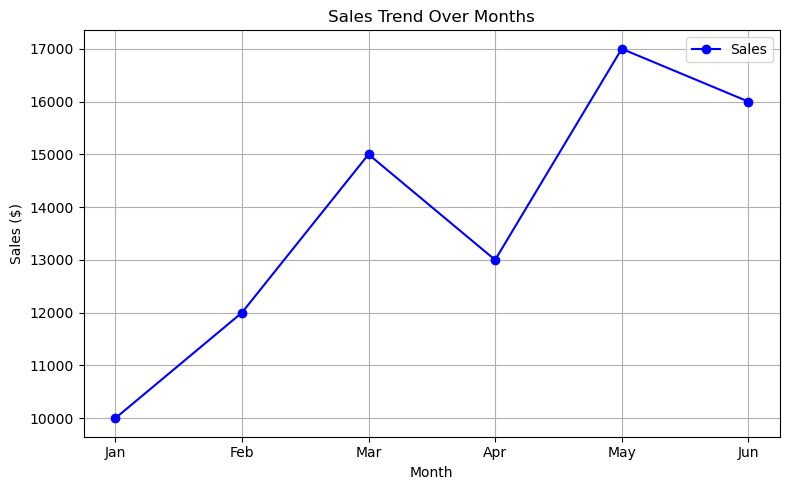

In [16]:
# 1 -line plot sales over time 

import matplotlib.pyplot as plt 

# Line Plot: Sales over Time 
plt.figure(figsize=(8,5))
plt.plot(df['Month'], df['Sales'], color='blue', marker='o', linestyle='-', label='Sales')
plt.title('Sales Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Output : A line plot showing the sales trend over the months.

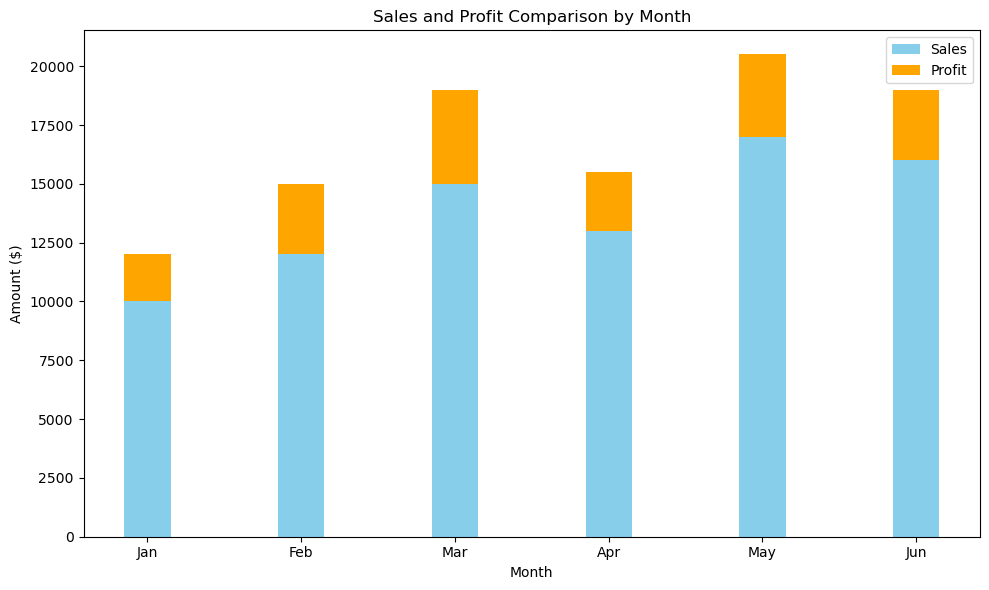

In [18]:
# Bar Plot: Sales vs Profit by Month
plt.figure(figsize=(10, 6))
width = 0.3
plt.bar(df['Month'], df['Sales'], width=width, label='Sales', color='skyblue')
plt.bar(df['Month'], df['Profit'], width=width, label='Profit', color='orange', bottom=df['Sales'])
plt.title('Sales and Profit Comparison by Month')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()
plt.show()

# A stacked bar plot where you can compare Sales and Profit for each month.

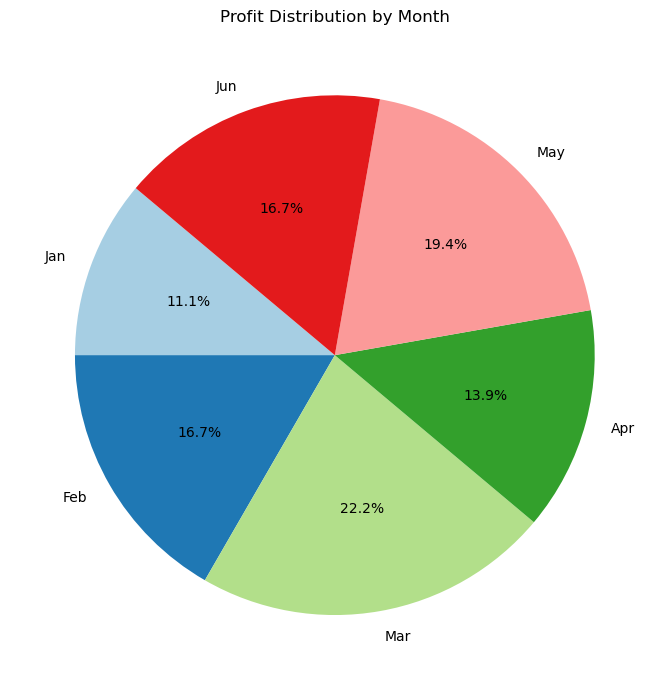

In [20]:
# Pie Chart: Profit Distribution by Month
plt.figure(figsize=(7, 7))
plt.pie(df['Profit'], labels=df['Month'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Profit Distribution by Month')
plt.tight_layout()
plt.show()

# A pie chart displaying the proportion of profit distribution for each month.

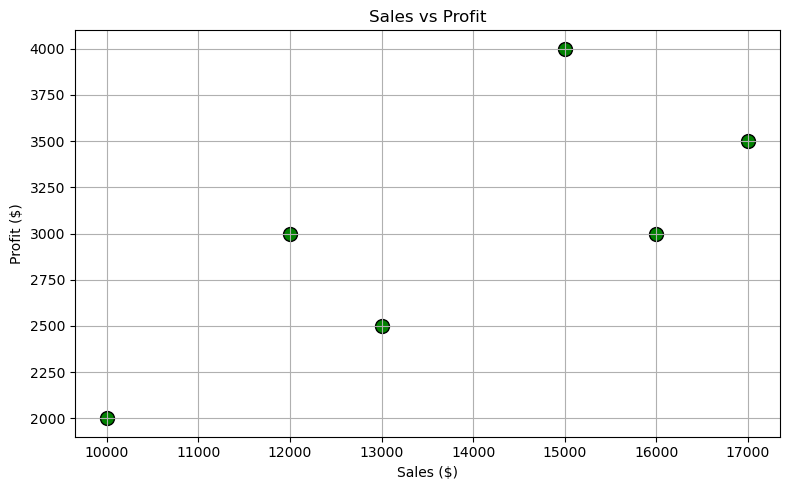

In [22]:
# Scatter Plot: Sales vs Profit (Correlation)
plt.figure(figsize=(8, 5))
plt.scatter(df['Sales'], df['Profit'], color='green', s=100, edgecolors='black')
plt.title('Sales vs Profit')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# A scatter plot showing the correlation between Sales and Profit.

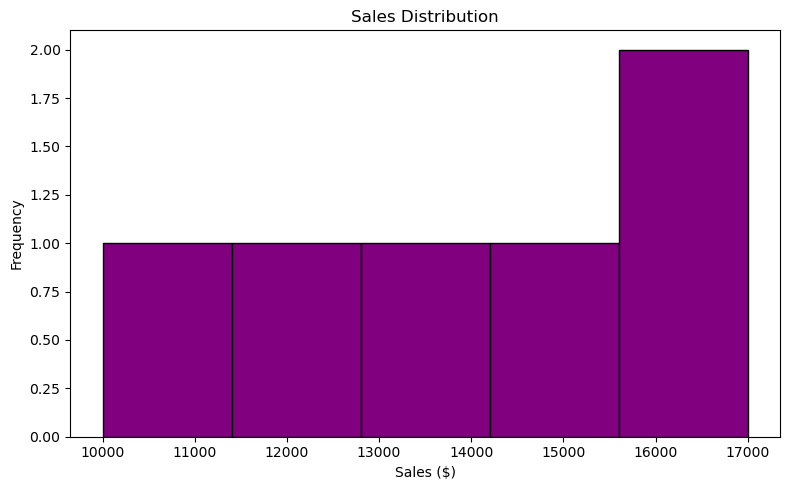

In [24]:
# Histogram: Distribution of Sales
plt.figure(figsize=(8, 5))
plt.hist(df['Sales'], bins=5, color='purple', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# A histogram showing the distribution of Sales values across months.

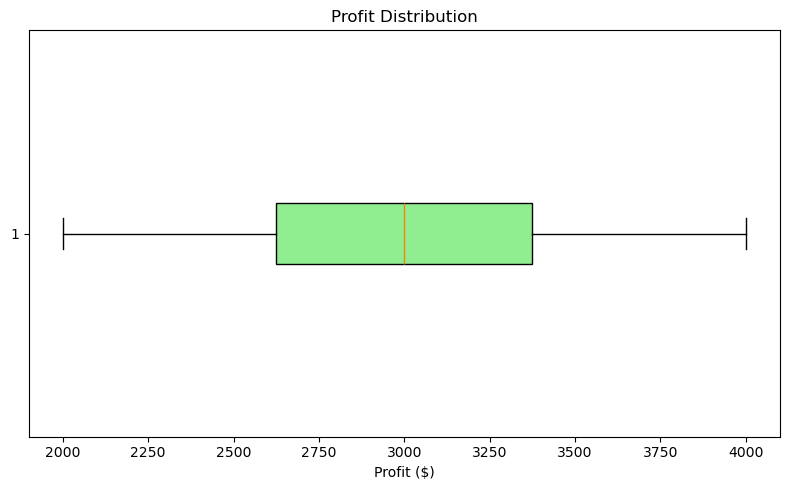

In [26]:
# Box Plot: Profit Distribution
plt.figure(figsize=(8, 5))
plt.boxplot(df['Profit'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title('Profit Distribution')
plt.xlabel('Profit ($)')
plt.tight_layout()
plt.show()

# A box plot showing the spread and outliers of Profit.

In [28]:
!pip install gradio

In [30]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Sales": [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000]
}
df = pd.DataFrame(data)

# Function to return selected plot
def generate_plot(plot_type):
    fig = plt.figure(figsize=(8, 5))

    if plot_type == "Line Plot":
        plt.plot(df['Month'], df['Sales'], color='blue', marker='o', label='Sales')
        plt.title('Sales Trend Over Months')
        plt.xlabel('Month')
        plt.ylabel('Sales ($)')
        plt.grid(True)
        plt.legend()

    elif plot_type == "Stacked Bar Chart":
        fig.set_size_inches(10, 6)
        width = 0.3
        plt.bar(df['Month'], df['Sales'], width=width, label='Sales', color='skyblue')
        plt.bar(df['Month'], df['Profit'], width=width, label='Profit', color='orange', bottom=df['Sales'])
        plt.title('Sales and Profit Comparison by Month')
        plt.xlabel('Month')
        plt.ylabel('Amount ($)')
        plt.legend()

    elif plot_type == "Pie Chart":
        fig.set_size_inches(7, 7)
        plt.pie(df['Profit'], labels=df['Month'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title('Profit Distribution by Month')

    elif plot_type == "Scatter Plot":
        plt.scatter(df['Sales'], df['Profit'], color='green', s=100, edgecolors='black')
        plt.title('Sales vs Profit')
        plt.xlabel('Sales ($)')
        plt.ylabel('Profit ($)')
        plt.grid(True)

    elif plot_type == "Histogram":
        plt.hist(df['Sales'], bins=5, color='purple', edgecolor='black')
        plt.title('Sales Distribution')
        plt.xlabel('Sales ($)')
        plt.ylabel('Frequency')

    elif plot_type == "Box Plot":
        plt.boxplot(df['Profit'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
        plt.title('Profit Distribution')
        plt.xlabel('Profit ($)')

    plt.tight_layout()
    return fig

# Gradio UI
demo = gr.Interface(
    fn=generate_plot,
    inputs=gr.Radio(
        ["Line Plot", "Stacked Bar Chart", "Pie Chart", "Scatter Plot", "Histogram", "Box Plot"],
        label="Choose Plot Type"
    ),
    outputs=gr.Plot(label="Visualization"),
    title="Sales & Profit Visual Explorer",
    description="Choose a chart type to visualize the data."
)

demo.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
